# __Feature maps of VGG19__

### __Deep Learning__

#### __Project: Image Captioning with Visual Attention__

In [1]:
import os
os.chdir(os.environ["PYTHONPATH"])

import matplotlib.pyplot as plt

import seaborn as sns

import torch
from torchvision.models import vgg19
from torchvision import datasets as dset

import scripts.data_utils as du
from scripts.model import VGG19Encoder

%matplotlib inline
%load_ext autoreload
%autoreload 2


plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["image.cmap"] = "plasma"

In [2]:
encoder = VGG19Encoder()
coco = du.load_dataset(du.DatasetType.VALIDATION, vgg_preprocessed=True)

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


In [3]:
encoder.children

<bound method Module.children of VGG19Encoder(
  (vgg19): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, 

In [4]:
grizzly_img_index = 1
image, _ = coco[grizzly_img_index]
image = image.unsqueeze(0)

In [5]:
feature_maps, features_mean = encoder.forward(image)

feature_maps = feature_maps[0].detach()
features_mean = features_mean[0].detach()

print(f"Feature maps shape = {feature_maps.shape}")
print(f"Feature maps mean shape = {features_mean.shape}")

Feature maps shape = torch.Size([512, 14, 14])
Feature maps mean shape = torch.Size([14, 14])


In [6]:
# Computes mean and std of only nonzero elements in encoder_output tensor
nonzero_indices = torch.nonzero(feature_maps)
num_nonzero = nonzero_indices.shape[0]

mean = feature_maps.sum().item() / num_nonzero

std = 0
for nonzero_elem in nonzero_indices:
    x, y, z = nonzero_elem
    std += (feature_maps[x, y, z] - mean) ** 2

std = torch.sqrt(std / num_nonzero).item()

In [7]:
mean, std

(3.14699390748282, 3.8952431678771973)

<AxesSubplot:title={'center':'Feature map obtain from kernel number = 11'}>

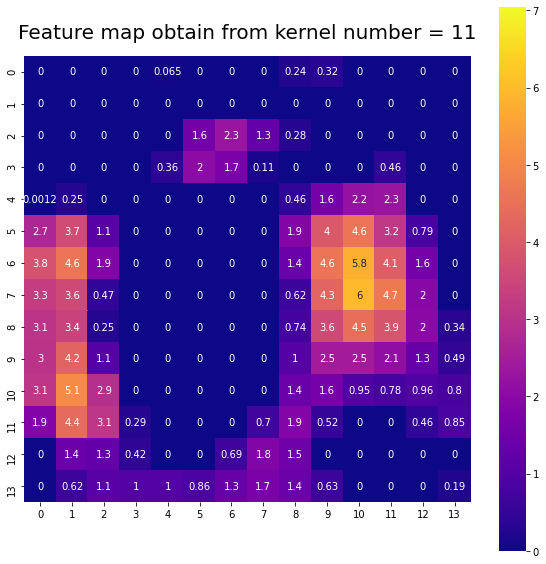

In [8]:
feature_map_index = 11

min_value = feature_maps.min().item()
max_value = mean + std

feature_map = feature_maps[feature_map_index]
    
plt.title(f"Feature map obtain from kernel number = {feature_map_index}", fontsize=20, y=1.025)
sns.heatmap(feature_map, annot=True, square=True, cmap=plt.rcParams["image.cmap"], vmin=min_value, vmax=max_value)

<AxesSubplot:title={'center':'Feature maps mean'}>

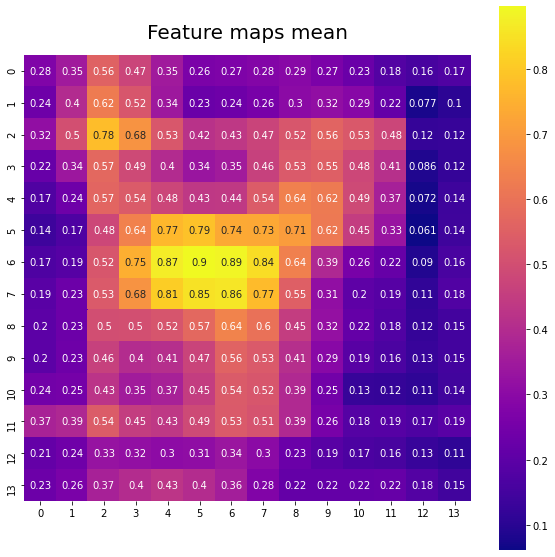

In [9]:
plt.title(f"Feature maps mean", fontsize=20, y=1.025)
sns.heatmap(features_mean, annot=True, square=True, cmap=plt.rcParams["image.cmap"])

In [10]:
FEATURE_MAP_DIR_PATH = os.path.join(os.getcwd(), "images", "feature_maps")
os.makedirs(FEATURE_MAP_DIR_PATH, exist_ok=True)

for index, feature_map in enumerate(feature_maps):
    plt.grid("off")
    sns.heatmap(
        feature_map, 
        annot=True, 
        square=True, 
        cbar=False,
        cmap=plt.rcParams["image.cmap"], 
        xticklabels=False, 
        yticklabels=False,
        vmin=min_value,
        vmax=max_value,
    )
    
    output_path = os.path.join(FEATURE_MAP_DIR_PATH, f"feature_map({index})")
    plt.savefig(output_path)
    plt.clf()

<Figure size 720x720 with 0 Axes>